In [1]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('city_market_tracker_EDA.tsv', sep='\t')

In [3]:
data.head()

,PERIOD_BEGIN,PERIOD_END,PERIOD_DURATION,REGION_TYPE,REGION_TYPE_ID,TABLE_ID,IS_SEASONALLY_ADJUSTED,REGION,CITY,STATE,...,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION,PARENT_METRO_REGION_METRO_CODE,LAST_UPDATED
0,2019-09-01,2019-09-30,30,place,6,20714,False,"West Pittston, PA",West Pittston,Pennsylvania,...,0.000000,0.274576,0.004459,0.007178,0.0,0.000000,0.000000,"Scranton, PA",42540,2025-09-26 14:45:14.874 Z
1,2016-04-01,2016-04-30,30,place,6,23715,False,"Lakewood, SC",Lakewood,South Carolina,...,0.013004,0.274576,0.004459,0.007178,0.0,-0.000363,0.023477,"Sumter, SC",44940,2025-09-26 14:45:14.874 Z
2,2017-07-01,2017-07-31,30,place,6,18497,False,"Silver Lake, OH",Silver Lake,Ohio,...,0.000000,0.272727,-0.277273,-0.249012,0.5,0.300000,0.250000,"Akron, OH",10420,2025-09-26 14:45:14.874 Z
3,2016-12-01,2016-12-31,30,place,6,15709,False,"Palmyra, WI",Palmyra,Wisconsin,...,0.000000,0.111111,0.020202,0.052288,0.0,-0.666667,0.000000,"Watertown, WI",48020,2025-09-26 14:45:14.874 Z
4,2022-03-01,2022-03-31,30,place,6,8708,False,"Huttig, AR",Huttig,Arkansas,...,0.013004,0.274576,0.004459,0.007178,0.0,-0.000363,0.023477,"El Dorado, AR",20980,2025-09-26 14:45:14.874 Z


In [4]:
len(data)

6010471

In [5]:
# PRICE_DROPS_YOY
data.isna().sum().max()

np.int64(0)

In [6]:
nan_summary = data.isna().sum().sort_values(ascending=False)
nan_percent = (data.isna().mean() * 100).sort_values(ascending=False)
pd.concat([nan_summary, nan_percent], axis=1, keys=['NaN Count', '% Missing'])

,NaN Count,% Missing
PERIOD_BEGIN,0,0.0
PERIOD_END,0,0.0
PERIOD_DURATION,0,0.0
REGION_TYPE,0,0.0
REGION_TYPE_ID,0,0.0
TABLE_ID,0,0.0
IS_SEASONALLY_ADJUSTED,0,0.0
REGION,0,0.0
CITY,0,0.0
STATE,0,0.0


In [7]:
# Columns >70% empty - Drop (no columns)
# 40-70% empty - model based imputation
# Columns 0% - 40% empty - fill with mean

In [8]:
imp = IterativeImputer(max_iter = 10, random_state = 0)

for col in data.columns:
    nan_percent = data[col].isna().mean() * 100
    
    if 0 < nan_percent <= 40:
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace = True)

    elif 41 <= nan_percent <= 70:
        reshaped = data[[col]]
        data[col] = imp.fit_transform(reshaped)

In [9]:
numeric_df = data.select_dtypes(include = ['number'])
numeric_df = numeric_df.dropna(axis = 1, how='all')
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

corr = numeric_df.corr()

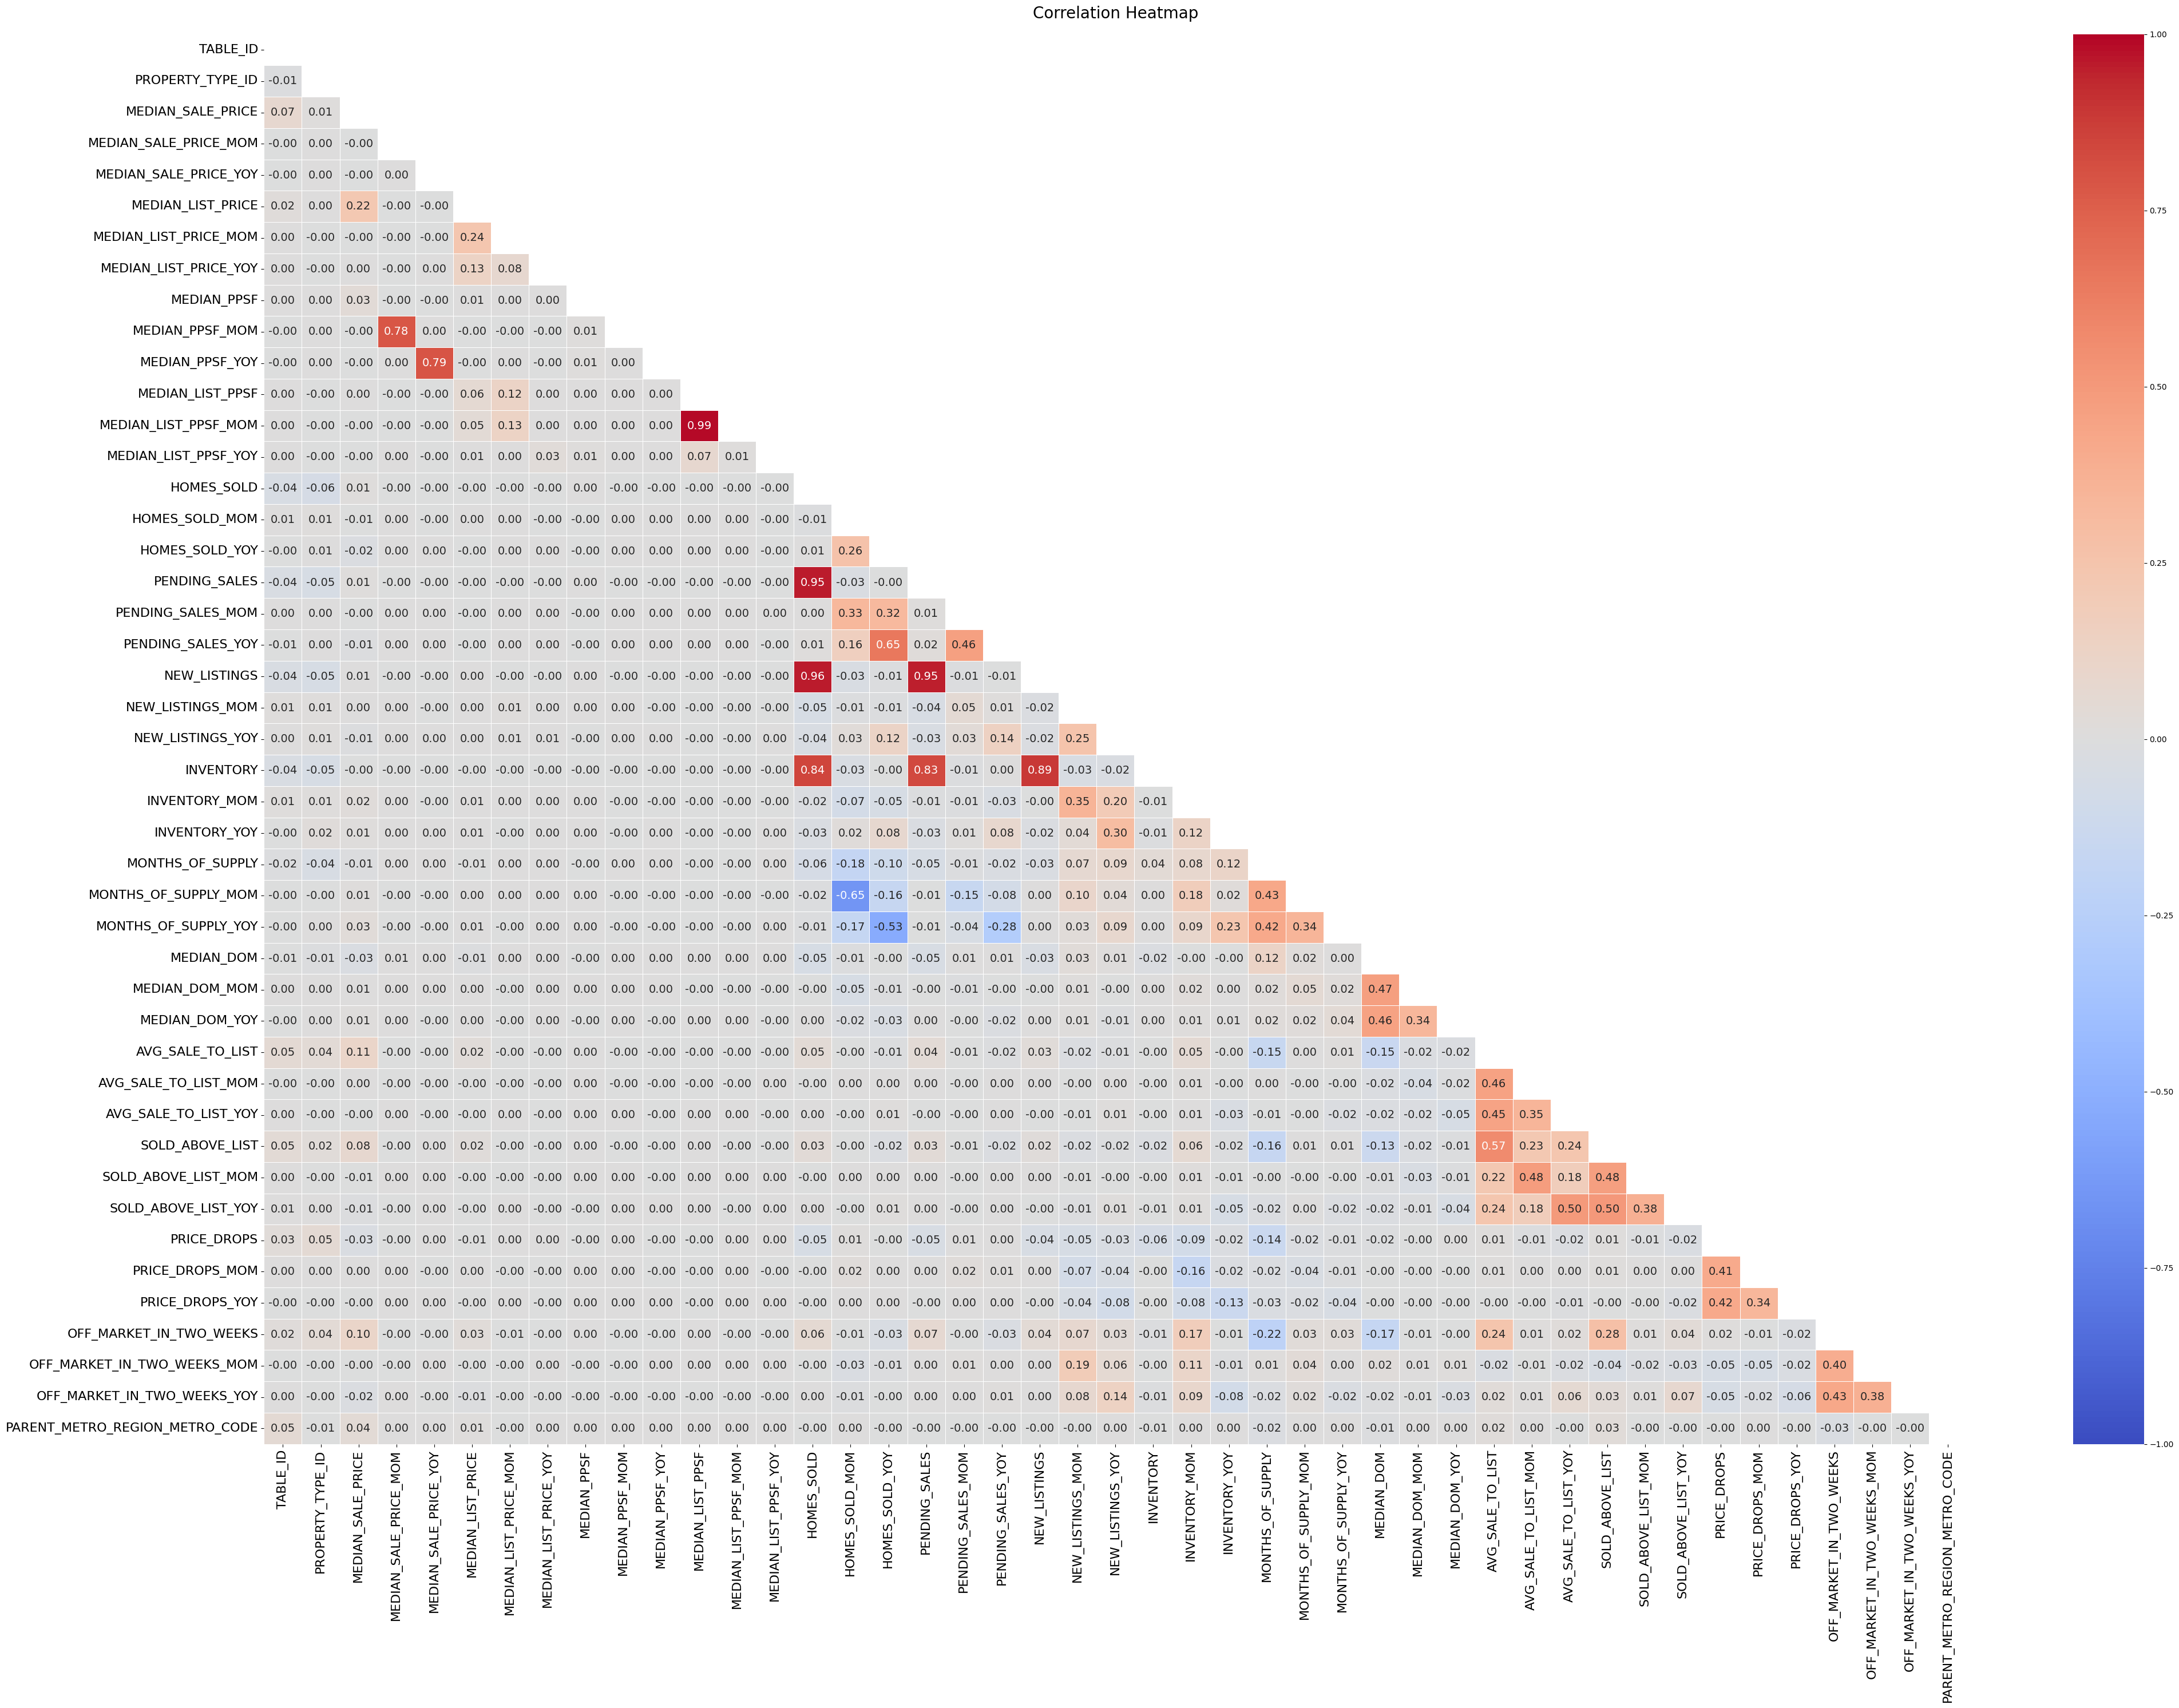

In [10]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(48, 32))
ax = sns.heatmap(corr, 
            mask = mask, 
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            annot = True,
            annot_kws={"size": 14},
            fmt = ".2f", 
            linewidths = 0.5)
ax.set_title("Correlation Heatmap", fontsize=20, pad=20)
ax.tick_params(axis='both', labelsize=16)
ax.figure.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

In [11]:
corr_matrix = numeric_df.corr().abs()

In [12]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

reduced_df = numeric_df.drop(columns=to_drop)

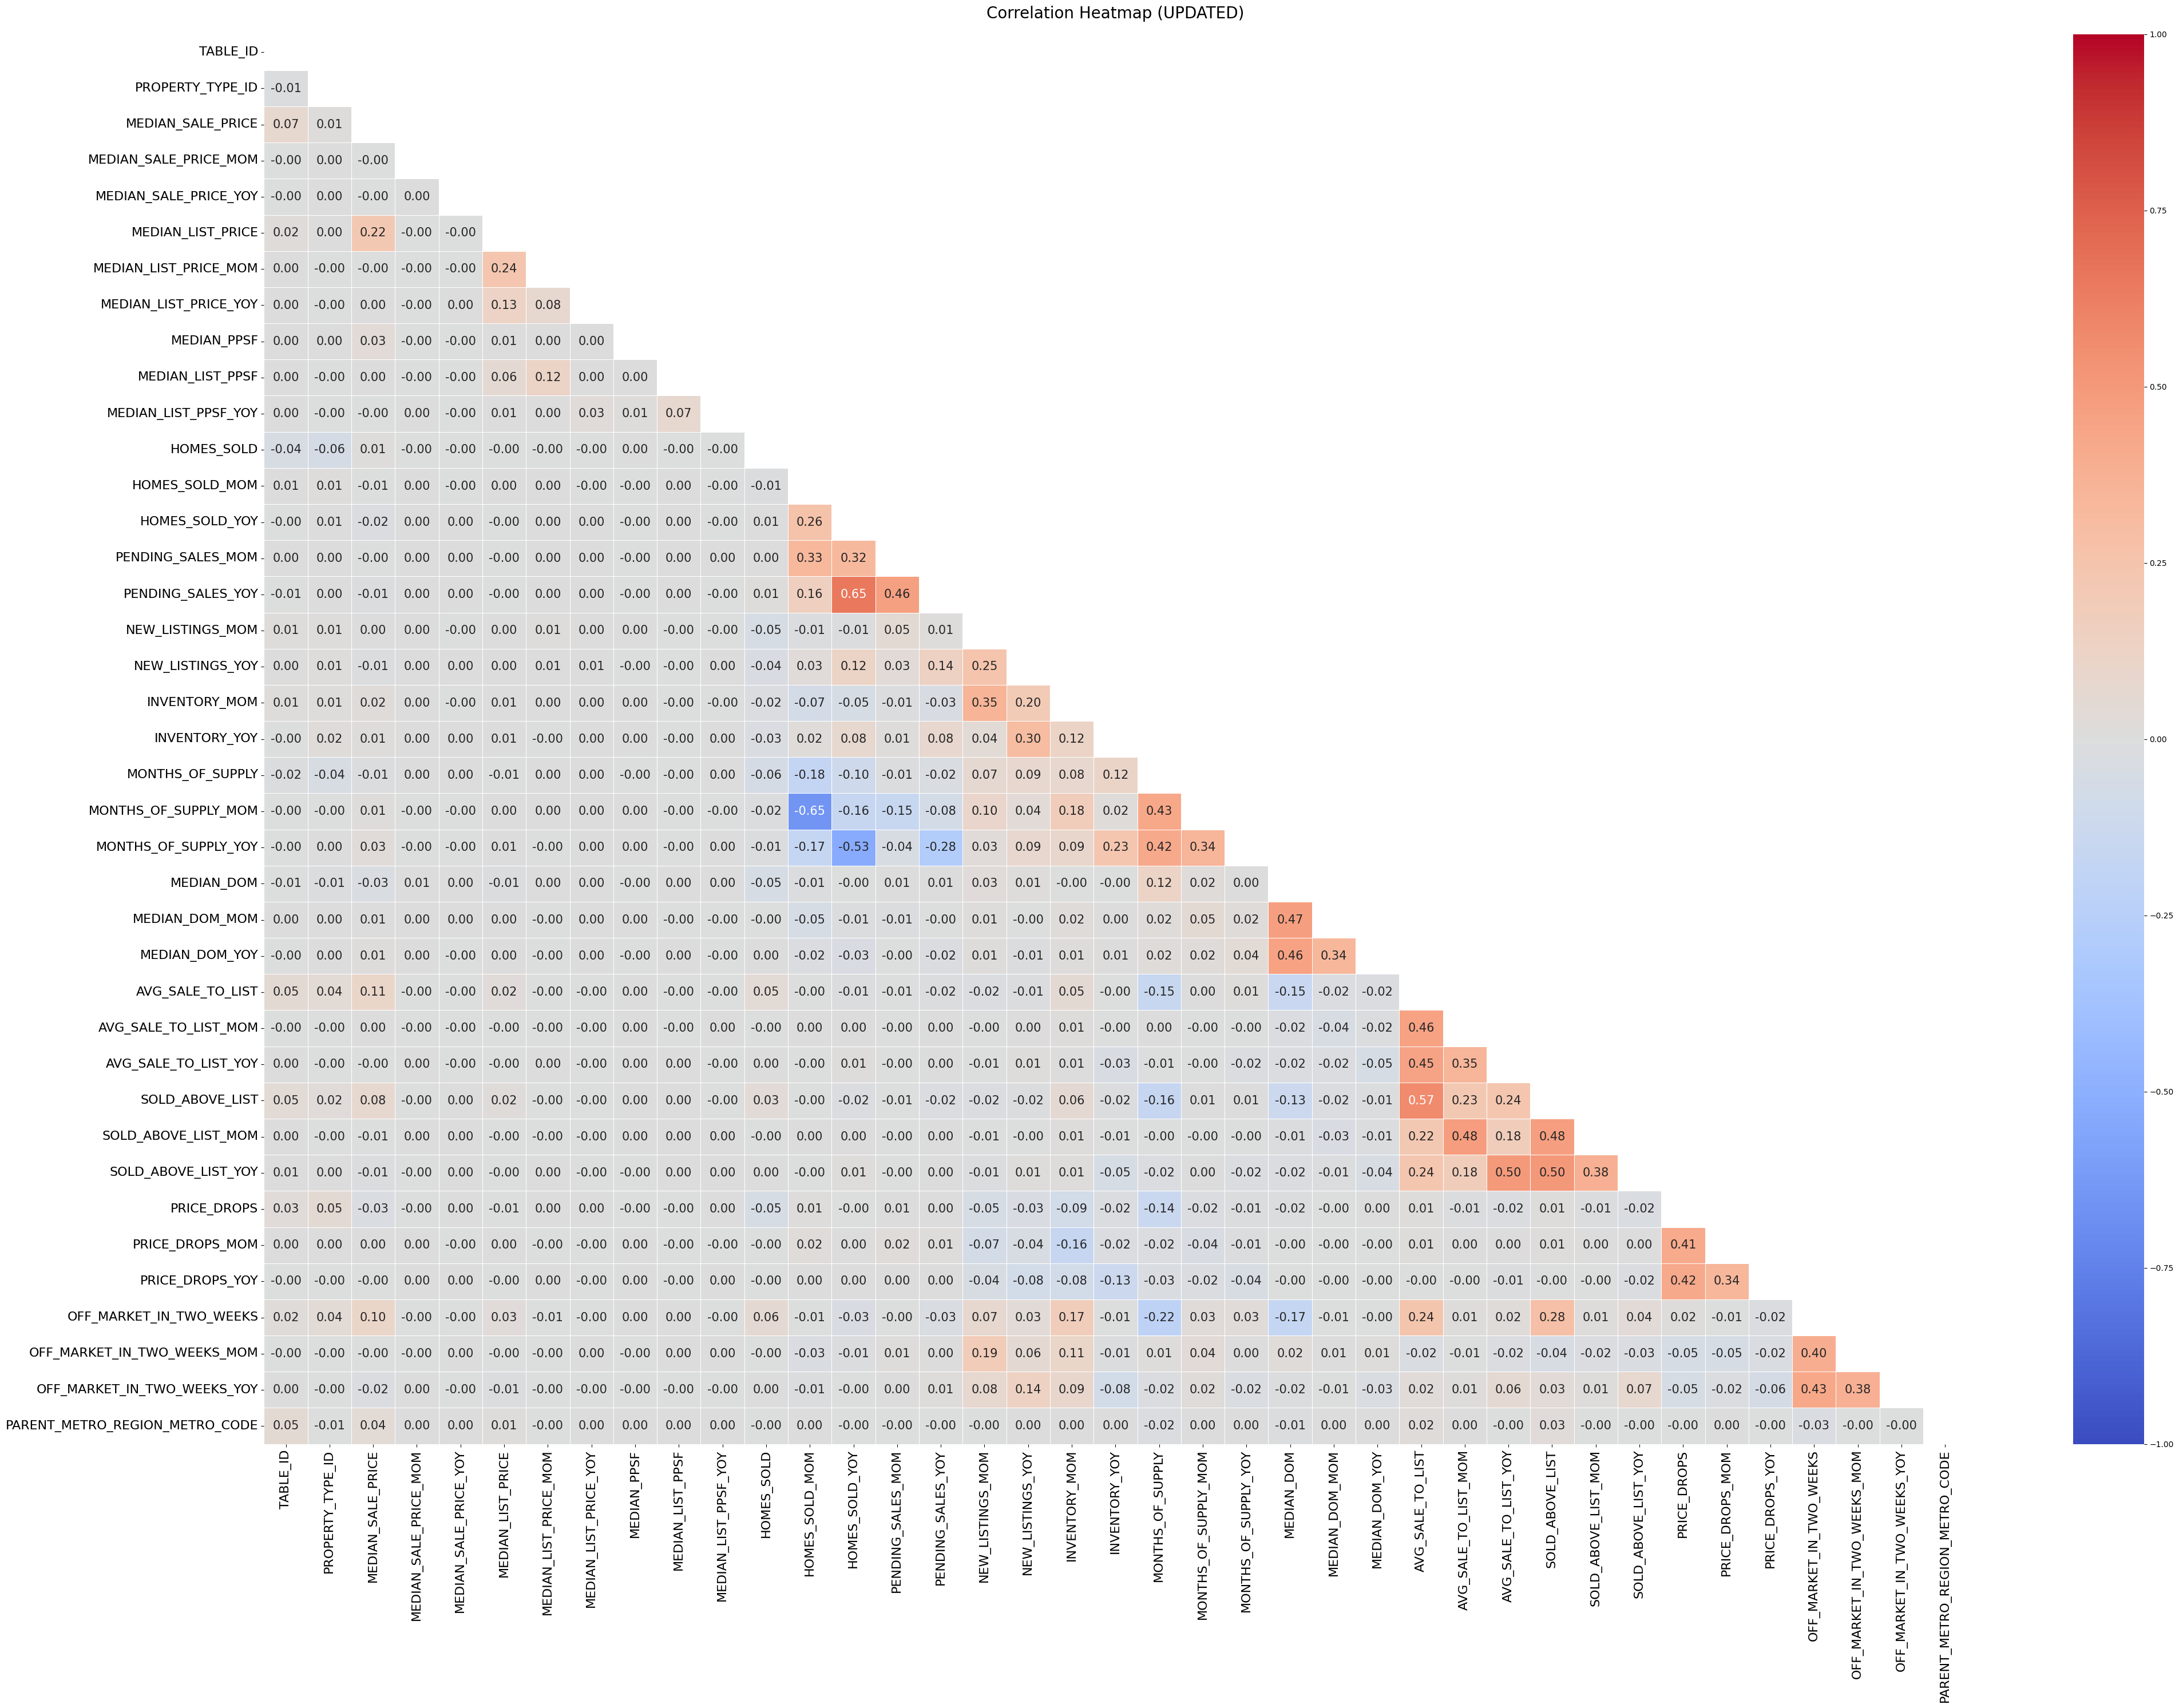

In [13]:
numeric_df1 = reduced_df.select_dtypes(include=['number'])

corr1 = numeric_df1.corr()

mask = np.triu(np.ones_like(corr1, dtype=bool))
plt.figure(figsize=(48, 32))
ax = sns.heatmap(corr1, 
            mask = mask, 
            cmap = 'coolwarm', 
            vmin = -1,
            vmax = 1,
            annot = True, 
            annot_kws={"size": 15},
            fmt = ".2f", 
            linewidths = 0.5)
ax.set_title("Correlation Heatmap (UPDATED)", fontsize=20, pad=20)
ax.tick_params(axis='both', labelsize=16)
ax.figure.savefig("correlation_heatmap_UPDATED.png", dpi=300, bbox_inches='tight')
plt.show()

In [14]:
reduced_df.columns

Index(['TABLE_ID', 'PROPERTY_TYPE_ID', 'MEDIAN_SALE_PRICE',
       'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY', 'MEDIAN_LIST_PRICE',
       'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY', 'MEDIAN_PPSF',
       'MEDIAN_LIST_PPSF', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES_MOM',
       'PENDING_SALES_YOY', 'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY',
       'INVENTORY_MOM', 'INVENTORY_YOY', 'MONTHS_OF_SUPPLY',
       'MONTHS_OF_SUPPLY_MOM', 'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM',
       'MEDIAN_DOM_MOM', 'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST',
       'AVG_SALE_TO_LIST_MOM', 'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST',
       'SOLD_ABOVE_LIST_MOM', 'SOLD_ABOVE_LIST_YOY', 'PRICE_DROPS',
       'PRICE_DROPS_MOM', 'PRICE_DROPS_YOY', 'OFF_MARKET_IN_TWO_WEEKS',
       'OFF_MARKET_IN_TWO_WEEKS_MOM', 'OFF_MARKET_IN_TWO_WEEKS_YOY',
       'PARENT_METRO_REGION_METRO_CODE'],
      dtype='object')

In [15]:
# Remove Outliers
for col in reduced_df.columns:
    Q1, Q3 = reduced_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    reduced_df[col] = reduced_df[col].clip(lower, upper)

In [16]:
# Recoimbine data
non_numeric_df = data.select_dtypes(exclude=['number'])
final_df = pd.concat([non_numeric_df, reduced_df], axis=1)

In [17]:
len(final_df)

6010471

In [18]:
final_df.columns

Index(['PERIOD_BEGIN', 'PERIOD_END', 'REGION_TYPE', 'IS_SEASONALLY_ADJUSTED',
       'REGION', 'CITY', 'STATE', 'STATE_CODE', 'PROPERTY_TYPE',
       'PARENT_METRO_REGION', 'LAST_UPDATED', 'TABLE_ID', 'PROPERTY_TYPE_ID',
       'MEDIAN_SALE_PRICE', 'MEDIAN_SALE_PRICE_MOM', 'MEDIAN_SALE_PRICE_YOY',
       'MEDIAN_LIST_PRICE', 'MEDIAN_LIST_PRICE_MOM', 'MEDIAN_LIST_PRICE_YOY',
       'MEDIAN_PPSF', 'MEDIAN_LIST_PPSF', 'MEDIAN_LIST_PPSF_YOY', 'HOMES_SOLD',
       'HOMES_SOLD_MOM', 'HOMES_SOLD_YOY', 'PENDING_SALES_MOM',
       'PENDING_SALES_YOY', 'NEW_LISTINGS_MOM', 'NEW_LISTINGS_YOY',
       'INVENTORY_MOM', 'INVENTORY_YOY', 'MONTHS_OF_SUPPLY',
       'MONTHS_OF_SUPPLY_MOM', 'MONTHS_OF_SUPPLY_YOY', 'MEDIAN_DOM',
       'MEDIAN_DOM_MOM', 'MEDIAN_DOM_YOY', 'AVG_SALE_TO_LIST',
       'AVG_SALE_TO_LIST_MOM', 'AVG_SALE_TO_LIST_YOY', 'SOLD_ABOVE_LIST',
       'SOLD_ABOVE_LIST_MOM', 'SOLD_ABOVE_LIST_YOY', 'PRICE_DROPS',
       'PRICE_DROPS_MOM', 'PRICE_DROPS_YOY', 'OFF_MARKET_IN_TWO_WEEKS',
    

In [19]:
final_df.head()

,PERIOD_BEGIN,PERIOD_END,REGION_TYPE,IS_SEASONALLY_ADJUSTED,REGION,CITY,STATE,STATE_CODE,PROPERTY_TYPE,PARENT_METRO_REGION,...,SOLD_ABOVE_LIST,SOLD_ABOVE_LIST_MOM,SOLD_ABOVE_LIST_YOY,PRICE_DROPS,PRICE_DROPS_MOM,PRICE_DROPS_YOY,OFF_MARKET_IN_TWO_WEEKS,OFF_MARKET_IN_TWO_WEEKS_MOM,OFF_MARKET_IN_TWO_WEEKS_YOY,PARENT_METRO_REGION_METRO_CODE
0,2019-09-01,2019-09-30,place,False,"West Pittston, PA",West Pittston,Pennsylvania,PA,All Residential,"Scranton, PA",...,0.000000,-0.177529,0.000000,0.274576,0.004459,0.007178,0.0,0.000000,0.000000,42540
1,2016-04-01,2016-04-30,place,False,"Lakewood, SC",Lakewood,South Carolina,SC,All Residential,"Sumter, SC",...,0.000000,0.000732,0.013004,0.274576,0.004459,0.007178,0.0,-0.000363,0.023477,44940
2,2017-07-01,2017-07-31,place,False,"Silver Lake, OH",Silver Lake,Ohio,OH,Single Family Residential,"Akron, OH",...,0.000000,-0.166667,0.000000,0.272727,0.004459,0.007178,0.5,0.008896,0.080460,10420
3,2016-12-01,2016-12-31,place,False,"Palmyra, WI",Palmyra,Wisconsin,WI,All Residential,"Watertown, WI",...,0.000000,0.000000,0.000000,0.138984,0.004459,0.007178,0.0,-0.011816,0.000000,48020
4,2022-03-01,2022-03-31,place,False,"Huttig, AR",Huttig,Arkansas,AR,Single Family Residential,"El Dorado, AR",...,0.961538,0.000732,0.013004,0.274576,0.004459,0.007178,0.0,-0.000363,0.023477,20980


In [20]:
df_ca = final_df[final_df['STATE'] == 'California'].copy()


print(f"Original dataset: {len(final_df)} rows")
print(f"California only: {len(df_ca)} rows")

Original dataset: 6010471 rows
California only: 476473 rows


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [22]:
df_ca['PERIOD_BEGIN'] = pd.to_datetime(df_ca['PERIOD_BEGIN'])
df_ca['PERIOD_END'] = pd.to_datetime(df_ca['PERIOD_END'])

df_ca['YEAR'] = df_ca['PERIOD_BEGIN'].dt.year
df_ca['MONTH'] = df_ca['PERIOD_BEGIN'].dt.month
df_ca['QUARTER'] = df_ca['PERIOD_BEGIN'].dt.quarter

df_ca['MONTH_SIN'] = np.sin(2 * np.pi * df_ca['MONTH'] / 12)
df_ca['MONTH_COS'] = np.cos(2 * np.pi * df_ca['MONTH'] / 12)

# Dropping columns
columns_to_drop = [
    'PERIOD_BEGIN', 'PERIOD_END',  # Date columns
    'STATE', 'STATE_CODE',  # Already filtered for CA
    'REGION_TYPE',  
]

X = df_ca.drop(columns=['MEDIAN_SALE_PRICE'])
y = df_ca['MEDIAN_SALE_PRICE']

X = X.drop(columns=columns_to_drop, errors='ignore')



In [23]:
# Handle categorical variables
categorical_columns = X.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_columns)}")

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

print(f"\nFeatures after encoding: {X_encoded.shape[1]}")


Categorical columns: ['REGION', 'CITY', 'PROPERTY_TYPE', 'PARENT_METRO_REGION', 'LAST_UPDATED']

Features after encoding: 2912


In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Training set: 381178 samples
Test set: 95295 samples


In [ ]:
# Train Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1 
)

print("\nTraining model...")
rf_model.fit(X_train, y_train)


Training model...


In [ ]:
# Predictions and evaluate
y_pred = rf_model.predict(X_test)

print(f"\n{'='*50}")
print("MODEL PERFORMANCE")
print(f"{'='*50}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred)):,.2f}")
print(f"MAE: ${mean_absolute_error(y_test, y_pred):,.2f}")


MODEL PERFORMANCE
R² Score: 0.9296
RMSE: $57,318.81
MAE: $35,409.14


In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n{'='*50}")
print("TOP 15 MOST IMPORTANT FEATURES")
print(f"{'='*50}")
print(feature_importance.head(15).to_string(index=False))

# Actual vs Predicted comparison (first 10 predictions)
comparison = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred[:10],
    'Error': y_test.values[:10] - y_pred[:10]
})
print(f"\n{'='*50}")
print("SAMPLE PREDICTIONS")
print(f"{'='*50}")
print(comparison.to_string(index=False))


TOP 15 MOST IMPORTANT FEATURES
                              feature  importance
                          MEDIAN_PPSF    0.734066
                    MEDIAN_LIST_PRICE    0.108796
            PROPERTY_TYPE_Condo/Co-op    0.036923
                MEDIAN_SALE_PRICE_MOM    0.015130
PROPERTY_TYPE_Multi-Family (2-4 Unit)    0.009688
                MEDIAN_SALE_PRICE_YOY    0.009437
                MEDIAN_LIST_PRICE_MOM    0.008834
                     MEDIAN_LIST_PPSF    0.007056
                     PROPERTY_TYPE_ID    0.004607
              PROPERTY_TYPE_Townhouse    0.004235
                             TABLE_ID    0.004084
       PARENT_METRO_REGION_METRO_CODE    0.003902
                MEDIAN_LIST_PRICE_YOY    0.003149
                                 YEAR    0.002968
                     AVG_SALE_TO_LIST    0.002897

SAMPLE PREDICTIONS
  Actual     Predicted         Error
732000.0 730800.090558   1199.909442
515000.0 527785.480371 -12785.480371
732000.0 521979.498968 210020.501032


In [ ]:
# Save the trained Random Forest model for later reuse
import joblib
print('\nSaving trained RandomForest model to disk...')
joblib.dump(rf_model, 'rf_model.joblib')
print('Saved model to rf_model.joblib')

# Preprocessing helper used to prepare new data for prediction
def preprocess_for_prediction(df, reference_columns):
    df = df.copy()
    # Ensure date features are present and create cyclical month features
    df['PERIOD_BEGIN'] = pd.to_datetime(df['PERIOD_BEGIN'])
    df['YEAR'] = df['PERIOD_BEGIN'].dt.year
    df['MONTH'] = df['PERIOD_BEGIN'].dt.month
    df['QUARTER'] = df['PERIOD_BEGIN'].dt.quarter
    df['MONTH_SIN'] = np.sin(2 * np.pi * df['MONTH'] / 12)
    df['MONTH_COS'] = np.cos(2 * np.pi * df['MONTH'] / 12)
    # Drop columns we don't use in the model (safe to ignore if missing)
    columns_to_drop = ['PERIOD_BEGIN', 'PERIOD_END', 'STATE', 'STATE_CODE', 'REGION_TYPE']
    X = df.drop(columns=columns_to_drop, errors='ignore')
    # One-hot encode categorical columns using the same approach as training
    categorical_columns = X.select_dtypes(include=['object']).columns
    X_encoded_new = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
    # Align new data's columns to the training feature columns (fill missing with 0)
    X_aligned = X_encoded_new.reindex(columns=reference_columns, fill_value=0)
    return X_aligned

# Load new data for prediction
new_df = df_ca.copy()

if not new_df.empty:
    # Preprocess and align to training features
    X_new = preprocess_for_prediction(new_df, X_encoded.columns)
    # Predict using the trained Random Forest model
    preds = rf_model.predict(X_new)
    new_df['PREDICTED_MEDIAN_SALE_PRICE'] = preds
    out_path = 'D3/city_predictions_with_preds.tsv'
    new_df.to_csv(out_path, sep='	', index=False)
    print(f'Saved predictions to {out_path}')
    # Show sample rows
    display(new_df.head())
else:
    print('No new data loaded; please provide a valid TSV at ' + new_data_path)
